In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.



In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
salary_discrimi_column = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [3]:
def lin_reg_equ(salary_discrimi_column, df):
    input_column = df[salary_discrimi_column]
    salary = df['Salary']
    linear_regr_salary_discrimini = linear_model.LinearRegression()
    linear_regr_salary_discrimini.fit(input_column, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrimi_column, linear_regr_salary_discrimini.coef_, linear_regr_salary_discrimini.intercept_))

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

### Salary Discrimination, Task 1

Find the linear regression equation for this data using columns 1-5 to column 6.

In [4]:
lin_reg_equ(salary_discrimi_column, df)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.146547255623


### Salary Discrimination, Task 2

Find the selection of columns with the best $R^2$ score.


In [5]:
def lin_reg_wrt_focus(salary_discrimi_column, df, focus='Salary'):
    input_column = df[salary_discrimi_column]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_column, focus_output)
    return regr_sd.score(input_column, focus_output)

In [6]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrimi_column, df)))

R^2 score for equation using all columns: 0.854718067441097


In [7]:
def get_combos(colum):
    return [it.combinations(colum, n + 1) for n in range(len(colum))]

In [8]:
combos = get_combos(salary_discrimi_column)

In [9]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [10]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.854718067441097, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.8455476412979359, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987165, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274631, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180406, ('Sex', 'Year', 

### Salary Discrimination, Task 2 Conclusion

The selection with the best $R^2$ score is: `Sex`, `Rank`, `Year`, `Degree`, `YSdeg`: **0.854718067441097**

**However**, although including all of the columns produces the highest $R^2$ score, there are two dominant factors: **`Year`** and **`Rank`**. Just these two factors taken together have a score of **0.8436480933264597**.


### Salary Discrimination, Task 3

Report whether sex is a factor in salary.

It is worth noting that `Sex` on its own has a score very close to zero **(0.063898925832880038)**, indicating that it has no direct influence on salary.

In [11]:
num_by_sex = df.Sex.value_counts()
print('Num of Men: {}\nNum of Women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num of Men: 38
Num of Women: 14


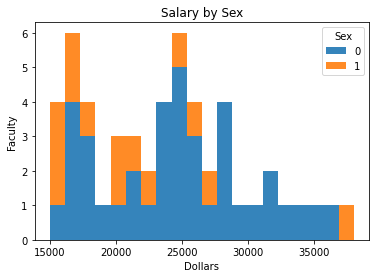

In [12]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.9, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

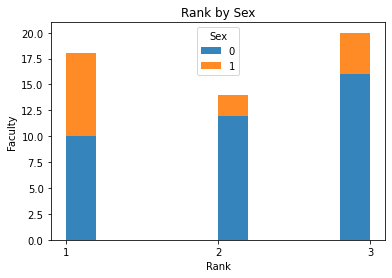

In [13]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.9, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

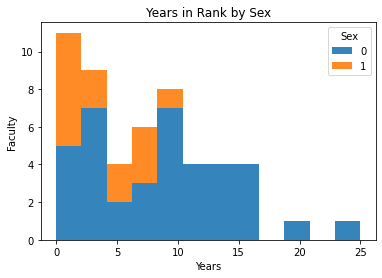

In [14]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.9, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

The women at this university have only been at their present rank for at most 10 years; let's compare with the men who have a similar number of years.

### Comparing Men and Women with Similar Number of Years

In [15]:
df_10 = df[df['Year'] <= 10]

In [16]:
combos_10 = get_combos(salary_discrimi_column)
combo_10_scores = all_combo_scores(combos_10, df_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660303, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007231, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138204, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080976, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522838, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482056, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

Again, we see that **`Sex` has no direct influence on `Salary`**: score of **0.0068777005613497311**.

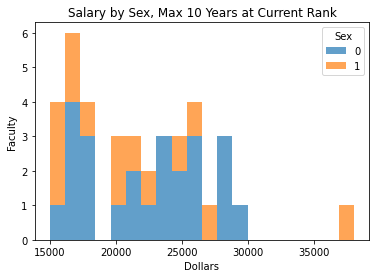

In [17]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

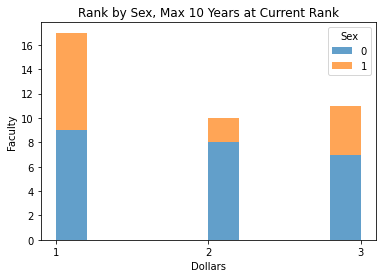

In [18]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

The data show that there is no direct salary discrimination by sex; however, we should investigate the single largest influencer of salary—`Rank`.

In [19]:
rank_discrim_col = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_col)
combo_rank_scores = all_combo_scores(combos_rank, df_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279377, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933464, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037699, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423393, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252254, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162726713, ('Degree',))]

### Salary Discrimination, Task 3 Conclusion

Without looking at the influencers of `Rank`, looking only at their present rank for 10 years or less, there is no correlation with `Sex`.

 **There is no salary discrimination by `Sex`.**